## Intro

[Good news everyone!](https://www.youtube.com/watch?v=ZxoNhqmEsnY) It's an easier day today `:)`

The purpose of today's class is to explore data using **interactive visualizations**. Interactivity is a key part of modern dataviz. It's a way to allow users of your visualizations get their own feel for the data ... to create richer visualization, where people who use your work can expose more of the data by exploring.

## Part 1: Video Lectures and Reading

Starting this week, we'll be playing around with *explanatory data visualization*. Roughly speaking this means using data visualization to communicate your results to others. Thus, there are new things to think about. 

Until today we have worked with static data visualization. However, exploratory data analysis means to be able to explore the multi-faceted nature of data and *interactive dataviz* is a handy tool to do it! It allows to play with the data: Toggle the view. Zoom. Drag. Show more details. All those things. Those are a key part of modern data visualization. 

The video below provides context about these points.

We start with the video and then read a bit from a scientific article about types of explanatory dataviz. (*The video is from an old version of the class that used D3, so just ignore those parts.*).

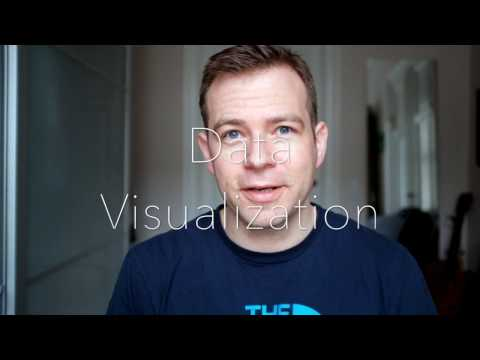

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('yHKYMGwefso', width=800, height=450)

> *Exercises*: Explanatory data visualization. 
> * What are the three key elements to keep in mind when you design an explanatory visualization?
> * In the video I talk about (1) *overview first*,  (2) *zoom and filter*,  (3) *details on demand*. 
>   - Go online and find a visualization that follows these principles (don't use one from the video). 
>   - Explain how your video achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.
> * Explain in your own words: How is explanatory data analysis different from exploratory data analysis?
>
> **Note**. Keep your answers to the questions above short and sweet.

<div class="alert alert-block alert-info">
Try to answer these using your human brain.
</div>

1. Explanatory data analysis: 
- Start with a question (WHat is that we ant to communicate)
- Allow exploration
- Know your readers

3.  
**Explanatory** focuses on explaining patterns and insights found in the data to support a specific hypothesis or story. It is typically used after exploration, aiming to communicate findings clearly, often through well-designed visuals.

**Exploratory** is about discovering patterns, trends, and anomalies without a specific question in mind. It’s more open-ended, helping you understand the structure of the data and generate hypotheses.

- Exploratory = Discovering
- Explanatory = Communicating

## Gapminder’s Interactive World Health Chart
One excellent example of a public data visualization following Shneiderman’s “overview, zoom/filter, details” mantra is Gapminder’s interactive bubble chart of global health and wealth. This web-based tool (available on the Gapminder site) visualizes all countries by their life expectancy (y-axis) and income per person (x-axis), with bubble size representing population and color indicating region​. For further deatils look into the website: [Gapminder](https://www.gapminder.org/tag/chart/#:~:text=This%20chart%20shows%20the%20Life,Color%20is%20region)

### (1) *overview first*
Gapminder’s bubble chart provides an overview of the entire dataset at a glance. In its default view, every country in the world is displayed as a bubble positioned by income and life expectancy (e.g. the static snapshot above shows all 182 nations in 2015) . This comprehensive layout lets users immediately see broad patterns and comparisons – for example, how higher-income countries tend to have longer lifespans, and the spread of countries across different income levels​. By presenting the whole dataset upfront, the visualization gives context and a “big picture” understanding before any drilling down occurs​. 

![image](../images/week_6_research.png)

### (2) *zoom and filter*
The Gapminder tool then allows users to zoom in and filter the data to focus on subsets or specific ranges of interest. For instance, you can interactively adjust the chart’s axes (switching to a linear or logarithmic scale) to zoom into a crowded region of the plot or highlight variation among lower-income countries​. You can also filter or select specific groups – e.g. toggling regions or individual countries. The interface includes a play slider for year, so you can filter by time (viewing a particular year or animating through years). Users can even highlight a subset of nations (for example, selecting certain countries or continents) to examine them separately​.These features effectively let the viewer narrow their focus, drilling down from the initial overview to the details that interest them, all while still being able to pan or zoom out to maintain context as needed. For further details visit [Link](https://visualign.org/2011/07/28/bubble-charts-and-gapminders-trendalyzer/#:~:text=With%20the%20Trendalyzer%20you%20can,of%20the%20same%20data%20set)

### (3) *details on demand*

Finally, the visualization provides details on demand for any specific data point without overwhelming the initial view. When you hover over or click on a country’s bubble, a tooltip or label will appear showing that country’s name and the exact values (e.g. life expectancy, income, population, year) for that point in time. In Gapminder’s chart, for example, you might hover over the large red bubble for China and see a popup with China’s life expectancy and GDP per capita for the current year.

## Part 2: Interactive visualizations with Bokeh



To really master interactive visualizations, you will need to work with JavaScript, especially [D3](https://d3js.org). Given the limited time available for this class, we can't squeeze that in. But luckily Python has some pretty good options for interactive visualizations. You can find a range of different options [here](https://mode.com/blog/python-interactive-plot-libraries/).

Today, we'll explore [`Bokeh`](https://docs.bokeh.org/en/latest/), which provides lots of nice interactive funtionalities to Python. To work with Bokeh, we first set up our system:

1. If you haven't installed it yet please do so. You can simply follow [these steps](https://docs.bokeh.org/en/latest/docs/first_steps/installation.html)

2. To include Bokeh in your notebooks you can follow the [Bokeh: Using with Jupyter](https://docs.bokeh.org/en/latest/docs/user_guide/output/jupyter.html#jupyter) guide. Come back to this one when you need it

3. We aim to give you a gentle start with Bokeh and I am going to include more example code than usual in the follwing.
   * **HINT 1**: If you're not an experienced Python user, I recommend going to the [official user's guide](https://docs.bokeh.org/en/latest/docs/user_guide.html#userguide) and working through it. Start by clicking "Introduction" in the linked page. That page has a glossary, a section on output methods, stuff on settings, and interfaces that you can scroll through. The next page *Basic Plotting* where the action is. Spend some time working through that.
   * **HINT 2**: And by "working through it", I mean copy, paste, and run the code in your own notebook. 

Ok. Let's get started. First a general announcement on the data.

> **Announcement**
> * During this entire lecture, as always, we are going to work with the SF Crime Data. 
> * We will use data for the **period 2014-2024** (Jan 1st 2014 to Dec 31 2024).
> * We'll consider only the 10 focus crimes.


Now, to get you in the mood here's a little gif to illustrate what the goal of this exercise is:

![Movie](https://raw.githubusercontent.com/suneman/socialdata2025/main/files/Week6_1.gif)

If the gif isn't displaying on your system, you can download it [here](https://github.com/suneman/socialdata2025/blob/main/files/Week6_1.gif) and display locally.


> ***Exercise***: Recreate a new version of the results from **Week 2** (with updated dates) as an interactive visualisation (shown in the gif). To complete the exercise, follow the steps below to create your own version of the dataviz.

<div class="alert alert-block alert-info">
To learn about Bokeh and how it works, try to do this without LLM help. Only use if you get totally stuck after having tried all the various hints, and read the documentation. (Plus, notice the text en gray about the caption at the very end.)
</div>

### Data prep

A key step is to set up the data right. So for this one, we'll be pretty strict about the steps. The workflow is

1. Take the data for the period of 2014-2024 and group it by hour-of-the-day.
2. We would like to be able to easily compare how the distribution of crimes differ from each other, not absolute numbers, so we will work on *normalized data*:
    * To normalise data for within a crime category you simply to devide the count for each hour by the total number of this crime type. (To give a concrete example in the `DRUG/NARCOTIC` category, take the number of drug/narcotics-counts in 1st hour you should devide by the total number of drug/narcotic arrests, then you devide number of drug/narcotics-counts in 2nd hour by the total number of drug/narcotics arrests and so on)
    *  Your life will be easiest if you organize your dataframe as shown in [this helpful screenshot](https://github.com/suneman/socialdata2025/blob/main/files/W6_Part2_data.png).

If you've followed these steps, your data should be ready! Take a moment to celebrate. Below, we follow the [Bokeh guide for categorical data](https://docs.bokeh.org/en/latest/docs/user_guide/basic/bars.html).


1. First, let's convert our **Pandas Dataframe** to **Bokeh ColumnDataSource**:
   
  > ```python
  > source = ColumnDataSource(your_processed_dataframe)
  > ## it is a standard way to convert your df to bokeh
  > ```

2. We also need to create an empty figure (we will add our stuff here later on). Mini sub-exercise: Find the a guide how to define a figure in Bokeh online. Here is a little help:
  
  > ```python
  > p = figure(...., x_range = FactorRange(factors=hours), ...) 
  > #p is a standard way to call figures in Bokeh
  > #make sure to add x_range. In my case hours is a list on the form ['1', '2', '3' ... , '24']
  > #read up on the FactorRange in the guide
  > #do not forget to add other attributes to the figure, e.g. title, axis names and so on
  > ```

3. Now we are going to add the bars. In order to do so, we will use **vbar** (see the guide for help):
  
  > ```python
  > bar ={} # to store vbars
  > ### here we will do a for loop:
  > for indx,i in enumerate(focuscrimes):
  >     bar[i] = p.vbar(x='name_of_the_column_that_contain_hours',  top=i, source= src, 
  >                     ### we will create a vbar for each focuscrime
  >                     legend_label=i,  muted_alpha=..., muted = ....) 
  > #i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
  > #read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)
  > ```

4. The last thing to do is to make your legend interactive and display the figure:
  
  > ```python
  > p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
  > show(p) #displays your plot
  > ```

5. You will notice that the legend appears in the middle of the figure (and it occludes some of the data). In order to fix this look into [this guide](https://stackoverflow.com/questions/26254619/position-of-the-legend-in-a-bokeh-plot) as a start. <p style="color: gray;">It is OK to use an LLM for help on this part - the Bokeh documentation has changed over time, so this part is a little tricky.</p>
  
Now you should be able to recreate this amazing visualisation.


**EXTRA feature**: If you're interested in detailed instructions for more Bokeh visualizations for your final project, you can find more inspiration **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/Week8_extra_bokeh.ipynb)**.

In [2]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange, HoverTool, CustomJS, Select, Slider
from bokeh.layouts import column, row
from bokeh.io import output_notebook

In [3]:
df = pd.read_csv('../Assignment/merged_data.csv')
df = df[(df['Year'] >= 2014) & (df['Year'] <= 2024)]
df['Year'].sort_values().unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [4]:
focuscrimes = [
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY',
    'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT',
    'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
]
df = df[df['Category'].isin(focuscrimes)]
df['Category'].sort_values().unique()

array(['ASSAULT', 'BURGLARY', 'DRUG/NARCOTIC', 'LARCENY/THEFT',
       'PROSTITUTION', 'ROBBERY', 'STOLEN PROPERTY', 'VANDALISM',
       'VEHICLE THEFT', 'WEAPON LAWS'], dtype=object)

In [5]:
df['Hour'] = df['Time'].str.slice(0, 2).astype(int)
df['Hour'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [6]:
grouped = df.groupby(['Category', 'Hour']).size().reset_index(name='count')
pivoted = grouped.pivot(index='Hour', columns='Category', values='count').fillna(0)
pivoted = pivoted.apply(lambda col: col / col.sum(), axis=0)
pivoted.head()

Category,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS
Hour,,,,,,,,,,
0,0.048897,0.054130,0.030540,0.042763,0.098544,0.046498,0.046902,0.053830,0.039043,0.053795
1,0.043426,0.036768,0.018390,0.023724,0.058584,0.047898,0.027825,0.034262,0.022454,0.041980
2,0.037710,0.047047,0.016294,0.015679,0.048425,0.045327,0.027339,0.032005,0.018620,0.037079
3,0.020447,0.056749,0.012668,0.012100,0.033864,0.027905,0.022843,0.028198,0.015067,0.027714
4,0.015061,0.056173,0.007865,0.008943,0.015916,0.019536,0.021507,0.022708,0.012230,0.018295


In [7]:
output_notebook()
source = ColumnDataSource(pivoted)

p = figure(
    x_range=FactorRange(factors=[str(i) for i in range(24)]),
    width=800,
    height=450,
    title='Hour-by-hour Probabilities',
    toolbar_location='right',
    tools='pan,box_zoom,reset,save'
)
p.xaxis.axis_label = 'Hour of Day'
p.yaxis.axis_label = 'Relative Frequency'

colors = [
    "blue", "red", "green", "orange", "purple",
    "gold", "magenta", "brown", "gray", "cyan"
]


Loading BokehJS ...

In [8]:
bars = {}  # hold references if you want them
for i, crime in enumerate(focuscrimes):
    bars[crime] = p.vbar(
        x='Hour',
        top=crime,
        width=0.8,
        source=source,
        color=colors[i % len(colors)],
        legend_label=crime,
        muted=True,         # start as visible
        muted_alpha=0.05    # fade out or set to 0
    )

# Make legend interactive (click to hide/show a crime)
p.legend.click_policy = "mute"
p.legend.location = "center_left"

# Adjust legend font size and move it outside the plot area
p.add_layout(p.legend[0], 'left')
p.legend.label_text_font_size = '8pt'
p.legend.label_height = 15
p.legend.label_width = 15
p.legend.glyph_height = 15
p.legend.glyph_width = 15
p.legend.spacing = 4
p.legend.padding = 4

# Show the interactive plot
show(p)

#### Further implementations of Bokeh

In [9]:
grouped = df.groupby(['PdDistrict', 'Category']).size().reset_index(name='count')

# Pivot so each row is a district, each column is one crime type
pivoted = grouped.pivot(index='PdDistrict', columns='Category', values='count').fillna(0)

# Normalize each row by its row sum (sum of all crimes in that district)
pivoted = pivoted.apply(lambda row: row / row.sum(), axis=1)

# Some districts might have zero total crimes in your subset
pivoted = pivoted.fillna(0)

# Reset for Bokeh
pivoted.reset_index(inplace=True)

In [10]:
source = ColumnDataSource(pivoted)
districts = pivoted['PdDistrict'].tolist()     # for the x-axis
stackers = [c for c in focuscrimes]  

p = figure(
    x_range=districts, 
    height=450, 
    width=800,
    title='Normalized Crime by District (Stacked Bars)',
    toolbar_location='right',
    tools="pan,box_zoom,reset,save"
)

# Create a HoverTool. 
# $name inserts the "name=" assigned to each stacker 
# @$name inserts the column value for that stacker.
hover = HoverTool(tooltips=[
    ("District", "@PdDistrict"),
    ("Crime", "$name"),
    ("Fraction", "@$name{0.0%}")
])
p.add_tools(hover)          # columns we want to stack

In [11]:
colors = [
    "#5DA5DA", "#FAA43A", "#60BD68", "#F17CB0", "#B2912F",
    "#B276B2", "#DECF3F", "#F15854", "#4D4D4D", "#9467bd"
]

p.vbar_stack(
    stackers=stackers,
    x='PdDistrict',
    width=0.9,
    color=colors,
    source=source,
    legend_label=stackers,  # each stacker is one legend entry
    name=stackers           # crucial so HoverTool can use '$name'
)

# Format legend
p.legend.location = "center_left"
p.legend.orientation = "vertical"
p.legend.click_policy = "hide"  # let user hide stack segments
p.add_layout(p.legend[0], 'left')
p.legend.label_text_font_size = '8pt'
p.legend.label_height = 15
p.legend.label_width = 15
p.legend.glyph_height = 15
p.legend.glyph_width = 15
p.legend.spacing = 4
p.legend.padding = 4

p.xaxis.axis_label = "Police District"
p.yaxis.axis_label = "Relative Fraction of Crimes"
p.xaxis.major_label_orientation = 1.0  # rotate labels if needed
p.y_range.start = 0  # start y-axis at 0

show(p)

#### going further CUSTOM JS

In [21]:
grouped = df.groupby(['PdDistrict', 'Category']).size().reset_index(name='count')

# Pivot so each row is a district, each column is one crime type
pivoted = grouped.pivot(index='PdDistrict', columns='Category', values='count').fillna(0)
pivoted['TOTAL'] = pivoted.sum(axis=1)
source_master = ColumnDataSource(pivoted)
pivoted

Category,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS,TOTAL
PdDistrict,,,,,,,,,,,
BAYVIEW,12268,6361,2143,25214,28,3587,763,10398,12669,3387,76818
CENTRAL,11110,10194,2296,82491,499,4710,1353,14458,6064,1562,134737
INGLESIDE,9338,7113,1492,24345,41,3615,544,8905,11860,1966,69219
MISSION,17444,9337,5521,42143,1158,5823,1096,12305,10780,3259,108866
NORTHERN,11955,12274,4027,79334,236,4099,1274,13720,8822,1557,137298
PARK,3744,5149,1539,21901,10,924,318,4913,4681,465,43644
RICHMOND,3628,5403,676,32532,26,1254,360,5745,4983,452,55059
SOUTHERN,16410,10534,7099,68700,499,4859,1372,14149,7918,2447,133987
TARAVAL,5983,7004,809,30118,319,1801,406,7626,7616,874,62556


In [42]:
# Reset the index to make 'PdDistrict' a column
pivoted.reset_index(inplace=True)

# This "plot source" is what the glyph actually draws from
df_plot = pd.DataFrame({
    'PdDistrict': pivoted['PdDistrict'],
    'x': pivoted['ASSAULT'],         # default X
    'y': pivoted['BURGLARY'],        # default Y
    'size': pivoted['TOTAL']/10000 # scale factor for circle size
})

source_plot = ColumnDataSource(df_plot)

ValueError: cannot insert level_0, already exists

In [43]:
p = figure(
    width=600, 
    height=400,
    title="SF District Crimes: Dynamic Axis & Circle Size",
    tools="pan,box_zoom,reset,save",
)

# Draw circles from the "plot source"
# 'size' is in pixel units on screen.
r = p.circle(
    x='x', y='y',
    source=source_plot,
    size='size',        # from source_plot['size']
    fill_alpha=0.6,
    color="dodgerblue",
    line_color="black"
)

# Initial axis labels
p.xaxis.axis_label = "ASSAULT"
p.yaxis.axis_label = "BURGLARY"

In [44]:
crime_list = [
    'WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY',
    'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT',
    'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'
]   # Expand for all your focus crimes

dropdown_x = Select(title="X Crime", value="ASSAULT", options=crime_list)
dropdown_y = Select(title="Y Crime", value="BURGLARY", options=crime_list)

In [45]:
callback_code = """
// Retrieve master (all crimes) and the smaller plotting data
const masterData = source_master.data;
const plotData   = source_plot.data;

// The newly selected crimes
var xCrime = dropdown_x.value;
var yCrime = dropdown_y.value;

// Update x, y columns in plotData
for (let i = 0; i < masterData['PdDistrict'].length; i++) {
    plotData['x'][i] = masterData[xCrime][i];
    plotData['y'][i] = masterData[yCrime][i];
}

// Optionally recalculate the circle size (e.g. from 'TOTAL').
for (let i = 0; i < masterData['PdDistrict'].length; i++) {
    // Example: scale circle size by TOTAL, but you could do something more elaborate
    // e.g., an average of xCrime and yCrime, etc.
    plotData['size'][i] = masterData['TOTAL'][i] / 100.0;
}

// We changed the data, so let Bokeh know
source_plot.change.emit();

// -------------------------------
// Axis Label Updates
// We have the figure reference as 'figRef' in our args
// so we can set the axis labels dynamically
// Bokeh stores them in figRef.xaxis[0], figRef.yaxis[0].
figRef.xaxis[0].axis_label = xCrime;
figRef.yaxis[0].axis_label = yCrime;
"""

callback = CustomJS(
    args=dict(
        source_master=source_master,
        source_plot=source_plot,
        dropdown_x=dropdown_x,
        dropdown_y=dropdown_y,
        figRef=p            
    ),
    code=callback_code
)


dropdown_x.js_on_change('value', callback)
dropdown_y.js_on_change('value', callback)


In [46]:
layout = column(
    row(dropdown_x, dropdown_y),
    p
)

show(layout)

## Part 3: Narrative Dataviz

Let's finish up with some reading

*Reading*: [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf) by Edward Segel and Jeffrey Heer. We'll read section 1-3 today. (And the rest a bit later).

When you get to section 3 it's fun to open up the examples mentioned by the authors in a browser and explore them as you read the text. 

> *Exercise*: Answer a couple of questions about the paper.
> 
> * What is the *Oxford English Dictionary's* defintion of a narrative?
> * What is your favorite visualization among the examples in section 3? Explain why in a few words.

<div class="alert alert-block alert-info">
For this one, read the text with your human brain and try to answer on your own too.
</div>

#### Definition of a narrative
Before delving into their case studies, Segel and Heer clarify what they mean by “narrative.” They cite the Oxford English Dictionary definition of “narrative” as “an account of a series of events, facts, etc., given in order and with the establishing of connections between them.”​. Central to this definition is the idea of an ordered sequence with causal or thematic connections – essentially a chain that links events or facts into a coherent story. This notion informs the paper’s perspective that a data visualization can be narrative if it presents information in a sequenced, connected manner to tell a story​

## My favourite casestudy

Among the Section 3 case studies, one visualization that stands out as a particularly effective example of narrative visualization is the Gapminder “Human Development Trends” presentation (case study 3.4). This example excels in storytelling, interactivity, and user engagement, illustrating how to artfully combine an author-driven narrative with interactive exploration.

- **Storytelling**: The Gapminder presentation is essentially a story told with data. It carefully constructs a narrative arc for each topic – guiding the viewer from a general introduction to specific insights. Through on-screen text and voiceover-like annotations, it identifies key trends (for instance, highlighting how “the last 30 years changed the face of global poverty” as the data animates to show poverty shifting from Asia to Africa)​. The storytelling is clear and purposeful: the authors chose particular data indicators and time spans that support the “major conclusions” of the UN report, and they present them in a logical sequence (e.g., first showing overall health and wealth improvements, then revealing disparities by region). By the end of each section, the viewer has essentially been told a mini-story with a beginning, middle, and end – for example, a setup (“In the 1970s most poor lived in Asia…”), a development (“Now Africa is home to one-third of the poor…”), and a forward-looking conclusion (“By 2015, Africa will account for the majority…”). This narrative structure ensures that users come away with memorable insights, not just raw numbers. In terms of classic storytelling elements, Gapminder provides context, conflict (e.g. the surprising shifts or disparities in the data), and resolution (projections or implications for the future), all grounded in the visual evidence. 

- **Interactivity**: What makes Gapminder’s narrative truly engaging is the way it incorporates interactivity as part of the story. Rather than simply telling a static story or, conversely, dropping users into a free-form tool, it blends the two approaches. In the initial narrative phase, the user is mostly a passive observer, watching the guided animations and reading annotations. But at key junctures, the visualization invites the user to get involved. For example, after demonstrating a trend with animated charts, the interface might introduce a timeline slider or other controls and encourage the viewer to explore further (“Use the timebar to see people in Asia moving out of poverty” is one prompt given in the presentation). This martini-glass structure – a tight narrative followed by an open exploration – is highly effective here. It ensures the user isn’t lost; they’ve been oriented and primed by the story, so when interactive elements appear, the user has a good idea what to look for or what questions to ask. Moreover, the interactivity is designed to reinforce the narrative’s themes. In Gapminder, any interactive exploration still uses the same visual encodings and data that were introduced in the story, so when users play with the controls, they are essentially revisiting the story’s evidence from different angles. This keeps the experience cohesive. Technically, the interactivity is smooth and intuitive (e.g., clicking through slides, moving a slider, or mousing over a bubble for details), so it doesn’t distract or frustrate the audience; instead, it empowers them to investigate the data on their own terms. 

- **User Engagement**: The combination of strong narrative guidance and inviting interactivity leads to high user engagement. Because the presentation is user-paced, viewers remain active – they click “forward” to progress, which is a mild interaction in itself that keeps them involved. The frequent use of visual highlights and questions in the annotations keeps viewers thinking (“Why is this region lagging?” or “Notice how this bar grows…”). When the user is prompted to try an interactive feature, it feels like a natural next step in the story, which likely piques their curiosity rather than feeling like “homework.” In Gapminder’s case, the user engagement is also emotional and intellectual: Hans Rosling’s style (even if not delivered in person here) often frames the data in terms of human development achievements or crises, which can hook the viewer’s interest in the outcome. By letting the user “use the story as a starting point for his own exploration”, the visualization makes the audience an active participant in the narrative. This participatory element can increase engagement significantly – users are more likely to remember and care about insights they personally uncovered, even if the author carefully led them to that point. In summary, the Gapminder visualization stands out because it masters the balance between author-driven storytelling and reader-driven interaction. It tells a compelling data story (so the message is clear), uses interactivity to deepen understanding (not just for novelty’s sake), and keeps users both informed and interested. The effectiveness is evident in how seamlessly the story flows and how naturally the viewer is drawn into “playing” with the data, achieving the ultimate goal of narrative visualization: to connect with the audience and communicate insights in an engaging way.